In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Filepath to the dataset
filepath = r"D:\zee\Telecom Churn Analysis\excel csv"

#Define sheet name
sheet_name = "VW_ChurnData"

#Read the csv file into a pandas DataFrame
data = pd.read_csv(f"{filepath}/prediction_data.csv")

#Display the first few rows of the dataset
print(data.head())


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                27        NaN           Yes             No  ...   
1                13        NaN           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      65.599998    593.299988      0.000000   
1      Credit Card      -4.0

**Data processing**

In [2]:
#Drop columns that are not needed for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

#List of  columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 
    'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support',
    'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 
    'Payment_Method'
]

#Encode categorical variables
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

#Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

#Split the dataset into features and target variable
x = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Train Random Forest Model**

In [3]:
#initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model
rf_classifier.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Evaluate Model**

Confusion Matrix:
[[795  46]
 [135 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       841
           1       0.83      0.63      0.71       361

    accuracy                           0.85      1202
   macro avg       0.84      0.79      0.81      1202
weighted avg       0.85      0.85      0.84      1202



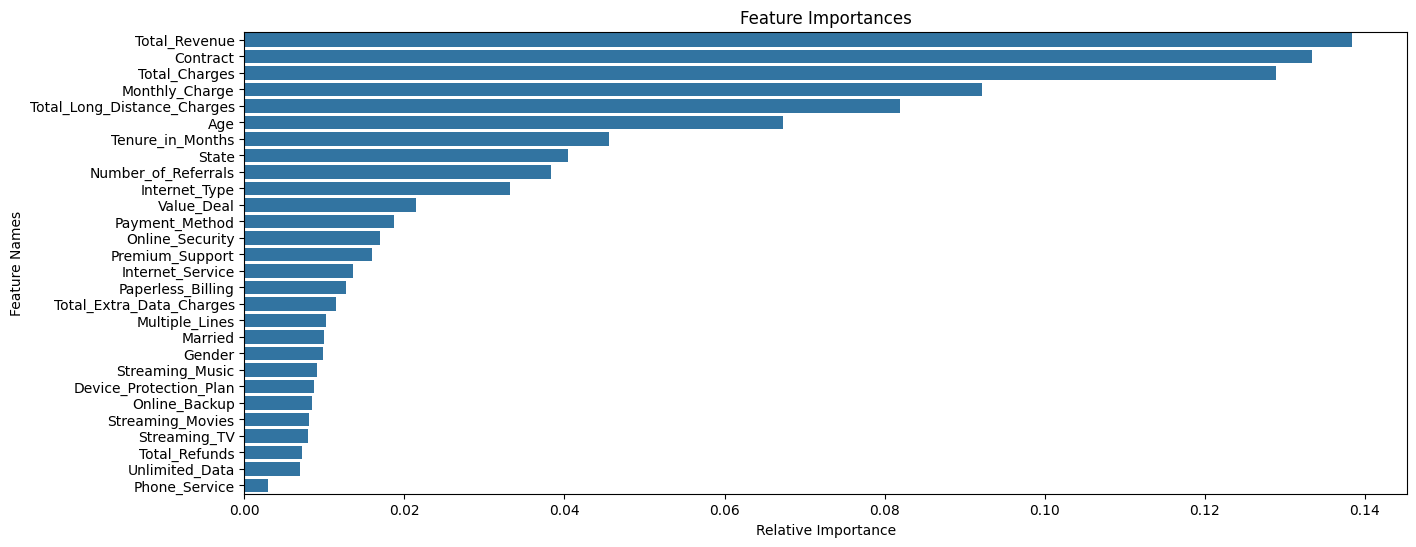

In [11]:
#Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")   
print(classification_report(y_test, y_pred))

#Features selection based on feature importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

#plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

**Predict on New Data**

In [13]:
#Define the path to the Joiner Data Excel
file_path = r"D:\zee\Telecom Churn Analysis\excel csv"

#define the sheet name
sheet_name = "VW_ChurnData"

#Read the JoinData csv file into a pandas DataFrame
new_data = pd.read_csv(f"{file_path}/JoinData.csv")

#Display the first few rows of the JoinData
print(joiner_data.head())

#Retain the orginal DataFrame to preserve unencoded columns
original_data = new_data.copy()

#Retain customer ID column
customer_ids = new_data['Customer_ID']

#Drop columns that are not needed for prediction in encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

#Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

#Make predictions 
new_predictions = rf_classifier.predict(new_data)

#Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

#Filter the DataFrame to show only churned customers
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

#Save the results to a new CSV file
original_data.to_csv(r"D:\zee\Telecom Churn Analysis\excel csv\churned_customers_predictions.csv", index=False)

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7        NaN           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18        NaN           Yes             No  ...   
4                 5        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      72.099998     72.099998           0.0   
1      Cre